In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [4]:
df = pd.read_csv("Creditcard_data.csv")

print("Original Dataset Distribution:")
print(df["Class"].value_counts())


Original Dataset Distribution:
Class
0    763
1      9
Name: count, dtype: int64


In [5]:
fraud = df[df["Class"] == 1]
non_fraud = df[df["Class"] == 0]

from imblearn.over_sampling import RandomOverSampler

# Initialize the oversampler
ros = RandomOverSampler(random_state=42)
X = df.drop("Class", axis=1)
y = df["Class"]

# Resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

print(balanced_df["Class"].value_counts()) # Should show 763 for both

Class
0    763
1    763
Name: count, dtype: int64


In [6]:
#sample 1 random sampling
sample1 = balanced_df.sample(frac=0.8, random_state=1)


In [7]:
#sample 2 systematic sampling
sample2 = balanced_df.iloc[::2]


In [8]:
#sample 3 stratified sampling
sample3, _ = train_test_split(
    balanced_df,
    test_size=0.2,
    stratify=balanced_df["Class"],
    random_state=42
)


In [9]:
#sample 4 cluster sampling
cluster_size = 100
clusters = [
    balanced_df.iloc[i:i+cluster_size]
    for i in range(0, len(balanced_df), cluster_size)
]

sample4 = pd.concat(clusters[:5])


In [10]:
#sample 5 bootstrap sampling
sample5 = balanced_df.sample(frac=0.8, replace=True, random_state=42)



In [11]:
models = {
    "M1": LogisticRegression(max_iter=1000),
    "M2": DecisionTreeClassifier(),
    "M3": RandomForestClassifier(),
    "M4": KNeighborsClassifier(),
    "M5": SVC()
}


In [12]:
def evaluate_sample(sample):
    X = sample.drop("Class", axis=1)
    y = sample["Class"]

    results = {}
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
        results[name] = round(scores.mean() * 100, 2)

    return results


In [13]:
results = {
    "Sampling1": evaluate_sample(sample1),
    "Sampling2": evaluate_sample(sample2),
    "Sampling3": evaluate_sample(sample3),
    "Sampling4": evaluate_sample(sample4),
    "Sampling5": evaluate_sample(sample5)
}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [14]:
results_df = pd.DataFrame(results)
print("\nFinal Accuracy Table:\n")
print(results_df)



Final Accuracy Table:

    Sampling1  Sampling2  Sampling3  Sampling4  Sampling5
M1      93.45      88.99      92.87       97.6      94.59
M2      99.10      90.40      99.51       89.6      99.34
M3     100.00      99.61     100.00       99.4     100.00
M4      97.79      77.83      97.62       99.4      97.79
M5      69.62      62.35      70.74       99.4      77.07


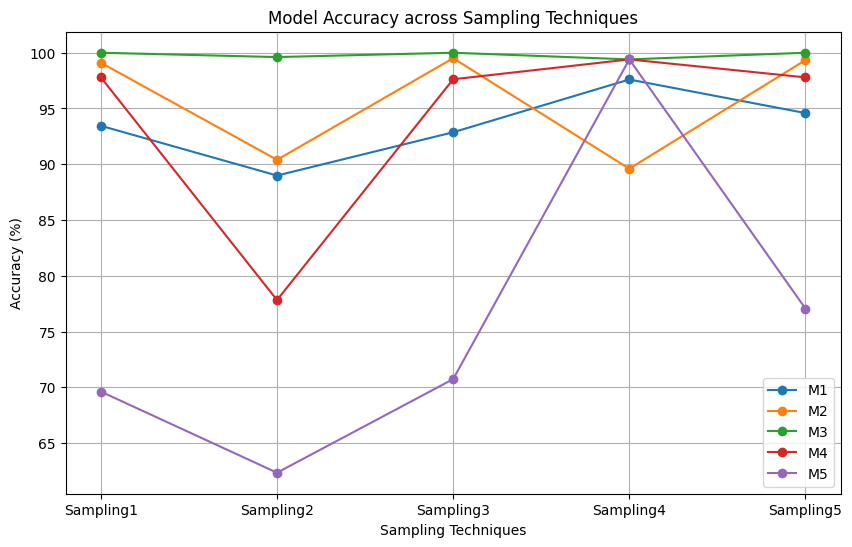

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

for model in results_df.index:
    plt.plot(
        results_df.columns,
        results_df.loc[model],
        marker='o',
        label=model
    )

plt.xlabel("Sampling Techniques")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy across Sampling Techniques")
plt.legend()
plt.grid(True)
plt.show()


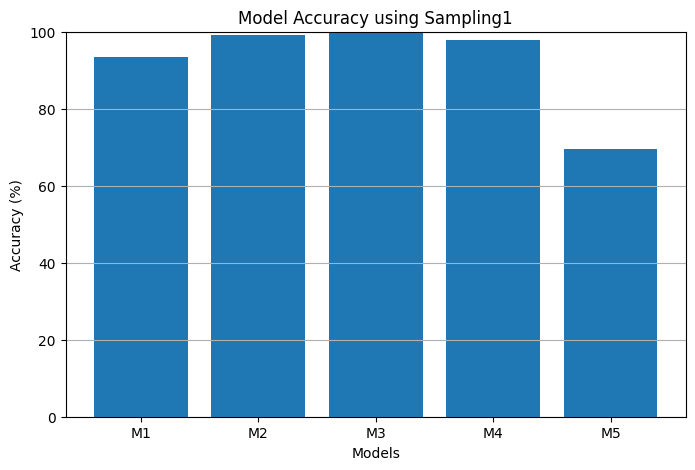

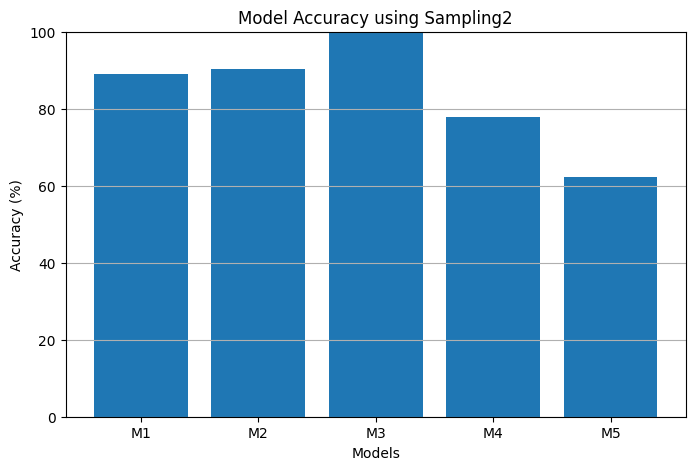

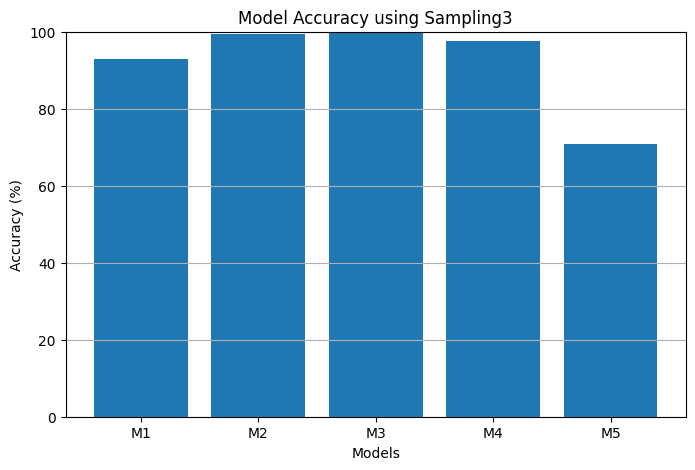

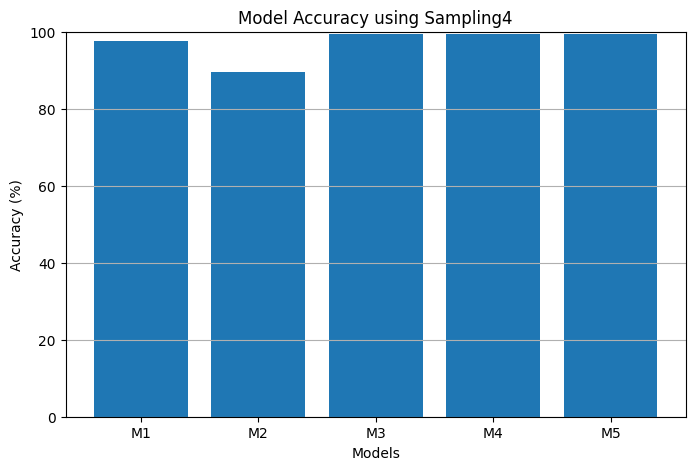

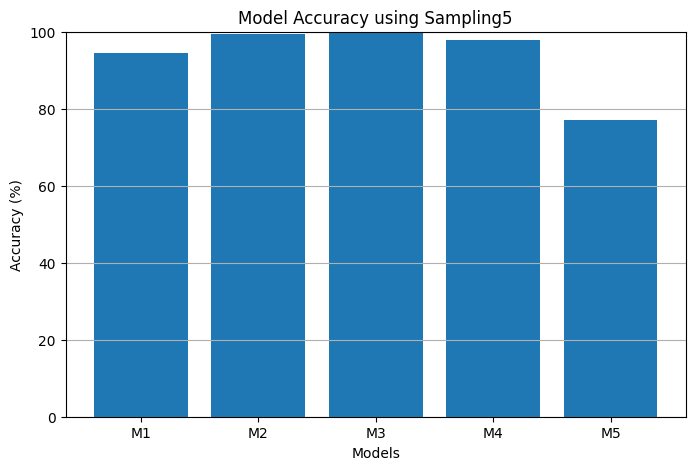

In [16]:
for sampling in results_df.columns:
    plt.figure(figsize=(8, 5))

    plt.bar(
        results_df.index,
        results_df[sampling]
    )

    plt.xlabel("Models")
    plt.ylabel("Accuracy (%)")
    plt.title(f"Model Accuracy using {sampling}")
    plt.ylim(0, 100)
    plt.grid(axis='y')
    plt.show()
